In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# **Importing Dataset**

In [ ]:
df = pd.read_csv("/content/PS_20174392719_1491204439457_log.csv",low_memory = False)

In [ ]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


# **Printing first 5 rows of the dataset**

In [ ]:
df.head(n=5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# **Dropping unnecessary columns**

In [ ]:
new_df= df.drop(['step','nameOrig','nameDest','isFlaggedFraud','oldbalanceDest','newbalanceDest'], axis = 1)

# **Printing the first 10 rows of the new formed dataset**

In [ ]:
new_df.head(n = 10)

,type,amount,oldbalanceOrg,newbalanceOrig,isFraud
0,PAYMENT,9839.64,170136.00,160296.36,0
1,PAYMENT,1864.28,21249.00,19384.72,0
2,TRANSFER,181.00,181.00,0.00,1
3,CASH_OUT,181.00,181.00,0.00,1
4,PAYMENT,11668.14,41554.00,29885.86,0
5,PAYMENT,7817.71,53860.00,46042.29,0
6,PAYMENT,7107.77,183195.00,176087.23,0
7,PAYMENT,7861.64,176087.23,168225.59,0
8,PAYMENT,4024.36,2671.00,0.00,0
9,DEBIT,5337.77,41720.00,36382.23,0


# **Converting Categorical data into a numeric data**

In [ ]:
new_df['type']=new_df['type'].map({'PAYMENT':1, 'TRANSFER':4, 'CASH_OUT':2, 'DEBIT':5, 'CASH_IN':3})

# **Printing the new dataset after the necessary changes**

In [ ]:
new_df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,isFraud
0,1,9839.64,170136.0,160296.36,0
1,1,1864.28,21249.0,19384.72,0
2,4,181.00,181.0,0.00,1
3,2,181.00,181.0,0.00,1
4,1,11668.14,41554.0,29885.86,0


# **Extracting Features (X) and Target (y) from DataFrame**

In [ ]:
X = new_df.iloc[:,:-1].values
y = new_df.iloc[:,-1].values

In [ ]:

print("X (Features):")
print(X)

print("\nFirst few rows of X:")
print(X[:5])

print("\nShape of X:", X.shape)

print("\nY (Target):")
print(y)

print("\nFirst few values of y:")
print(y[:5])

print("\nShape of y:", y.shape)


X (Features):
[[1.00000000e+00 9.83964000e+03 1.70136000e+05 1.60296360e+05]
 [1.00000000e+00 1.86428000e+03 2.12490000e+04 1.93847200e+04]
 [4.00000000e+00 1.81000000e+02 1.81000000e+02 0.00000000e+00]
 ...
 [2.00000000e+00 6.31140928e+06 6.31140928e+06 0.00000000e+00]
 [4.00000000e+00 8.50002520e+05 8.50002520e+05 0.00000000e+00]
 [2.00000000e+00 8.50002520e+05 8.50002520e+05 0.00000000e+00]]

First few rows of X:
[[1.0000000e+00 9.8396400e+03 1.7013600e+05 1.6029636e+05]
 [1.0000000e+00 1.8642800e+03 2.1249000e+04 1.9384720e+04]
 [4.0000000e+00 1.8100000e+02 1.8100000e+02 0.0000000e+00]
 [2.0000000e+00 1.8100000e+02 1.8100000e+02 0.0000000e+00]
 [1.0000000e+00 1.1668140e+04 4.1554000e+04 2.9885860e+04]]

Shape of X: (6362620, 4)

Y (Target):
[0 0 1 ... 1 1 1]

First few values of y:
[0 0 1 1 0]

Shape of y: (6362620,)


# **Splitting Data into Training and Test Sets**

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

# **Feature Scaling with Standardization for Machine Learning**

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **cnn model**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout,BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam

In [ ]:




import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve, auc
from sklearn.calibration import calibration_curve




## **Separate the dataset into non-fraudulent and fraudulent transactions**

In [ ]:
non_fraud = new_df[new_df['isFraud'] == 0]
fraud = new_df[new_df['isFraud'] == 1]

# **Display the shapes of the non-fraudulent and fraudulent datasets**

In [ ]:
non_fraud.shape, fraud.shape

((6354407, 5), (8213, 5))

# **Randomly sample the non-fraudulent dataset to match the size of the fraudulent dataset**

In [ ]:
non_fraud = non_fraud.sample(fraud.shape[0])
non_fraud.shape

(8213, 5)

# **Combine fraud and non-fraud datasets to create a balanced dataset**

In [ ]:
import pandas as pd


data = pd.concat([fraud, non_fraud], ignore_index=True)


In [ ]:
data

,type,amount,oldbalanceOrg,newbalanceOrig,isFraud
0,4,181.00,181.00,0.00,1
1,2,181.00,181.00,0.00,1
2,4,2806.00,2806.00,0.00,1
3,2,2806.00,2806.00,0.00,1
4,4,20128.00,20128.00,0.00,1
...,...,...,...,...,...
16421,1,11355.26,0.00,0.00,0
16422,2,246514.20,260349.00,13834.80,0
16423,1,12571.34,25047.77,12476.43,0
16424,2,41512.07,50941.00,9428.93,0


# **Count the number of fraudulent (1) and non-fraudulent (0) transactions in the combined dataset**

In [ ]:
data['isFraud'].value_counts()

,count
isFraud,
1,8213
0,8213


# Convert y_train and y_test to numpy **arrays**

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

# **Reshape X_train and X_test to include a third dimension for compatibility with convolutional neural networks**

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# **Display the new shapes of X_train and X_test after reshaping**

In [ ]:
X_train.shape, X_test.shape

((4771965, 4, 1), (1590655, 4, 1))

# **Defining the architecture of a Convolutional Neural Network (CNN)**

In [ ]:
epochs = 3
model = Sequential()
model.add(Conv1D(32,2, activation= 'relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Conv1D(64,2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **Display a summary of the model architecture, including layer types, output shapes, and number of parameters**

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 3, 32)               │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 3, 32)               │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 3, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 2, 64)               │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 2, 64)               │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,961 (50.63 KB)

 Trainable params: 12,769 (49.88 KB)

 Non-trainable params: 192 (768.00 B)

# **Compile the Model**

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


# **Train the Model**

In [ ]:

df['newbalanceOrig'] = df['newbalanceOrig'].fillna(df['newbalanceOrig'].median())  # or use mean()
df['isFraud'] = df['isFraud'].fillna(df['isFraud'].mode()[0])  # Mode for categorical data
df = df.dropna()
print("Missing values in the dataset:\n", df.isna().sum())
model_training_results = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test,y_test), verbose=1)

Missing values in the dataset:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64
Epoch 1/3
149124/149124 ━━━━━━━━━━━━━━━━━━━━ 682s 5ms/step - accuracy: 0.9971 - loss: 0.0133 - val_accuracy: 0.9992 - val_loss: 0.0030
Epoch 2/3
149124/149124 ━━━━━━━━━━━━━━━━━━━━ 546s 4ms/step - accuracy: 0.9991 - loss: 0.0038 - val_accuracy: 0.9992 - val_loss: 0.0026
Epoch 3/3
149124/149124 ━━━━━━━━━━━━━━━━━━━━ 558s 4ms/step - accuracy: 0.9992 - loss: 0.0035 - val_accuracy: 0.9993 - val_loss: 0.0024


In [ ]:
print(np.any(np.isnan(y_train)))



False


In [ ]:
import pandas as pd

print(df.isnull().sum())


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score


y_train_pred_cnn = model.predict(X_train)
y_val_pred_cnn = model.predict(X_test)


y_train_pred_cnn_binary = np.where(y_train_pred_cnn > 0.5, 1, 0)
y_test_pred_cnn_binary = np.where(y_val_pred_cnn > 0.5, 1, 0)


print("NaN values in y_train:", np.any(np.isnan(y_train)))
print("NaN values in y_test:", np.any(np.isnan(y_test)))


if np.any(np.isnan(y_train)) or np.any(np.isnan(y_test)):
    print("Handling NaN values...")


    train_mask = ~np.isnan(y_train)
    test_mask = ~np.isnan(y_test)

    y_train = y_train[train_mask]
    X_train = X_train[train_mask]

    y_test = y_test[test_mask]
    X_test = X_test[test_mask]


    y_train_pred_cnn = model.predict(X_train)
    y_val_pred_cnn = model.predict(X_test)


    y_train_pred_cnn_binary = np.where(y_train_pred_cnn > 0.5, 1, 0)
    y_test_pred_cnn_binary = np.where(y_val_pred_cnn > 0.5, 1, 0)

print("NaN values in y_train_pred_cnn_binary:", np.any(np.isnan(y_train_pred_cnn_binary)))
print("NaN values in y_test_pred_cnn_binary:", np.any(np.isnan(y_test_pred_cnn_binary)))


if not np.any(np.isnan(y_train)) and not np.any(np.isnan(y_test)) and \
   not np.any(np.isnan(y_train_pred_cnn_binary)) and not np.any(np.isnan(y_test_pred_cnn_binary)):


    train_accuracy_cnn = accuracy_score(y_train, y_train_pred_cnn_binary)
    val_accuracy_cnn = accuracy_score(y_test, y_test_pred_cnn_binary)

    print("Train accuracy:", train_accuracy_cnn)
    print("Validation accuracy:", val_accuracy_cnn)

else:
    print("There are still NaN values present in the data or predictions.")



149124/149124 ━━━━━━━━━━━━━━━━━━━━ 258s 2ms/step
49708/49708 ━━━━━━━━━━━━━━━━━━━━ 80s 2ms/step
NaN values in y_train: False
NaN values in y_test: False
NaN values in y_train_pred_cnn_binary: False
NaN values in y_test_pred_cnn_binary: False
Train accuracy: 0.9992646635086385
Validation accuracy: 0.9992726266852334


In [ ]:
train_accuracy = round(train_accuracy_cnn)
val_accuracy = round(val_accuracy_cnn)
print("Training Accuracy:", train_accuracy )
print("Validation Accuracy:",  val_accuracy)


Training Accuracy: 1
Validation Accuracy: 1


In [ ]:
if train_accuracy > val_accuracy:
    print("The model may be overfitting.")
elif train_accuracy < val_accuracy:
    print("The model may be underfitting.")
else:
    print("The model's performance on training and validation sets are similar")

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


# **To Check if the model is overfitting or underfitting**

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score


y_train_pred_cnn = model.predict(X_train)
y_val_pred_cnn = model.predict(X_test)


y_train_pred_cnn_binary = np.where(y_train_pred_cnn > 0.5, 1, 0)
y_test_pred_cnn_binary = np.where(y_val_pred_cnn > 0.5, 1, 0)

print("NaN values in y_train:", np.any(np.isnan(y_train)))
print("NaN values in y_test:", np.any(np.isnan(y_test)))


if np.any(np.isnan(y_train)) or np.any(np.isnan(y_test)):
    print("Handling NaN values...")

    train_mask = ~np.isnan(y_train)
    test_mask = ~np.isnan(y_test)

    y_train = y_train[train_mask]
    X_train = X_train[train_mask]

    y_test = y_test[test_mask]
    X_test = X_test[test_mask]


    y_train_pred_cnn = model.predict(X_train)
    y_val_pred_cnn = model.predict(X_test)

    y_train_pred_cnn_binary = np.where(y_train_pred_cnn > 0.5, 1, 0)
    y_test_pred_cnn_binary = np.where(y_val_pred_cnn > 0.5, 1, 0)


print("NaN values in y_train_pred_cnn_binary:", np.any(np.isnan(y_train_pred_cnn_binary)))
print("NaN values in y_test_pred_cnn_binary:", np.any(np.isnan(y_test_pred_cnn_binary)))

if not np.any(np.isnan(y_train)) and not np.any(np.isnan(y_test)) and
   not np.any(np.isnan(y_train_pred_cnn_binary)) and not np.any(np.isnan(y_test_pred_cnn_binary)):


    train_accuracy_cnn = accuracy_score(y_train, y_train_pred_cnn_binary)
    val_accuracy_cnn = accuracy_score(y_test, y_test_pred_cnn_binary)

    print("Train accuracy:", train_accuracy_cnn)
    print("Validation accuracy:", val_accuracy_cnn)

else:
    print("There are still NaN values present in the data or predictions.")


5788/5788 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
NaN values in y_train: False
NaN values in y_test: True
Handling NaN values...
5788/5788 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
NaN values in y_train_pred_cnn_binary: False
NaN values in y_test_pred_cnn_binary: False
Train accuracy: 0.9994060827920588
Validation accuracy: 0.9994816638590126


In [ ]:
train_accuracy = round(train_accuracy_cnn)
val_accuracy = round(val_accuracy_cnn)
print("Training Accuracy:", train_accuracy )
print("Validation Accuracy:",  val_accuracy)

Training Accuracy: 1
Validation Accuracy: 1


In [ ]:
if train_accuracy > val_accuracy:
    print("The model may be overfitting.")
elif train_accuracy < val_accuracy:
    print("The model may be underfitting.")
else:
    print("The model's performance on training and validation sets are similar")

The model's performance on training and validation sets are similar


# **Classification Report**

In [ ]:
print(classification_report(y_test, y_test_pred_cnn_binary, target_names=['No Fraud', 'Fraud']))

'''
0- No Fraud
1- Fraud
'''

              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00   1588628
       Fraud       0.94      0.46      0.62      2027

    accuracy                           1.00   1590655
   macro avg       0.97      0.73      0.81   1590655
weighted avg       1.00      1.00      1.00   1590655



'\n0- No Fraud\n1- Fraud\n'

# **Predicting a new result**

In [ ]:

input_data = np.array([[4,181.00, 181.00,0.00]])


input_data_reshaped = input_data.reshape((1, input_data.shape[1], 1))  # (batch_size, sequence_length, num_features)


predictions = model.predict(input_data_reshaped)


print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[1.]]


In [ ]:

input_data = np.array([[1,9839.64, 170136.0,160296.36]])



input_data_reshaped = input_data.reshape((1, input_data.shape[1], 1))  #


predictions = model.predict(input_data_reshaped)

print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
[[0.]]


# **Prediciting the test set results**

In [ ]:
y_pred = model.predict(X_test)

49708/49708 ━━━━━━━━━━━━━━━━━━━━ 86s 2ms/step


In [ ]:
threshold = 0.5   #A threshold of 0.5 is often chosen when there is no specific preference for precision or recall.
                  #It provides a balanced trade-off between the two metrics.
y_pred_binary = np.where(y_pred >= threshold, 1, 0)

# **Accuracy**

In [ ]:
accuracy = accuracy_score(y_test,y_pred_binary)
round(accuracy*100,2)

99.95

# **ROC Curve**

1930/1930 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step


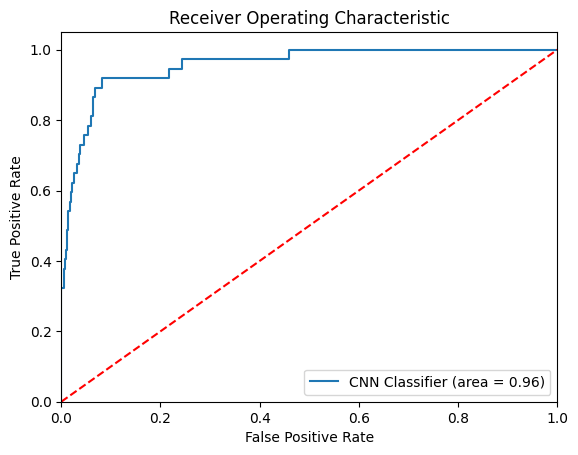

In [ ]:

y_pred_proba = model.predict(X_test)



fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, label='CNN Classifier (area = %0.2f)' % ann_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# **Precision-Recall Curve**

5788/5788 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step


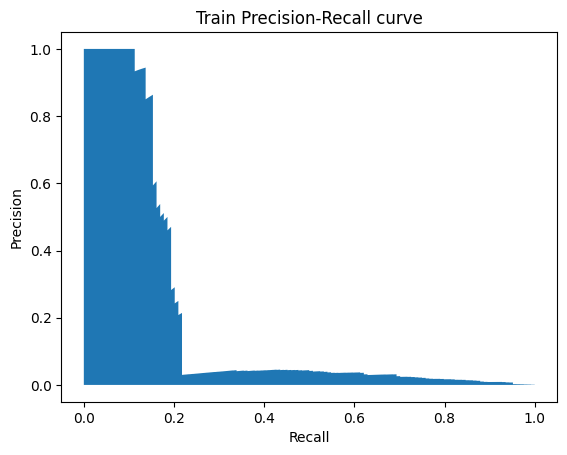

AUC-PRC: 0.1988249743949799


In [ ]:
y_prob_train_ann = model.predict(X_train)


precision_ann, recall_ann, _ = precision_recall_curve(y_train, y_prob_train_ann)


plt.fill_between(recall_ann, precision_ann)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve")
plt.show()
from sklearn.metrics import precision_recall_curve, auc
auc_prc = auc(recall_ann, precision_ann)
print("AUC-PRC:", auc_prc)

# **Confusion Matrix**

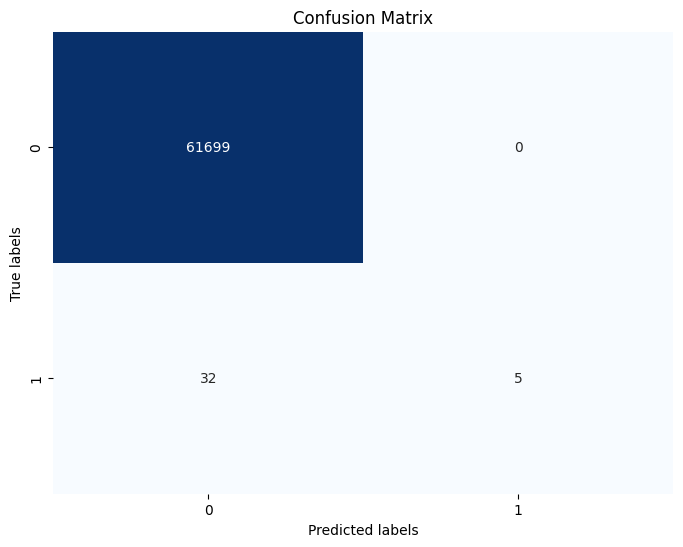

In [ ]:

cm = confusion_matrix(y_test, y_pred_binary)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# **Calibration Curve**

5788/5788 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


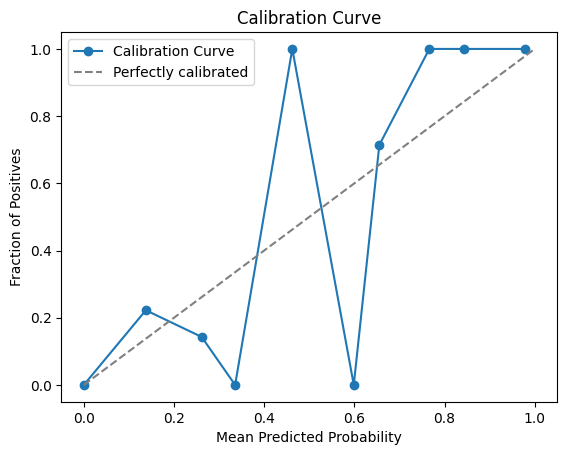

In [ ]:

y_prob_train_ann = model.predict(X_train)

prob_true, prob_pred = calibration_curve(y_train, y_prob_train_ann, n_bins=10)

plt.plot(prob_pred, prob_true, marker='o', linestyle='-', label='Calibration Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.legend()
plt.show()